In [20]:
from sqlalchemy import create_engine
import geopandas as  gpd
import geoalchemy2
import pandas as pd
import psycopg2

In [21]:
user = "postgres"
password = "mnbvcxz1234567"
host = "35.154.31.65"
port = 5432
database = "generic_db_ii"
 
conn = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(conn)

In [22]:
df=gpd.GeoDataFrame.from_postgis('select * from generic_db_ii.raw_data.hexgrid08_bom_ii_geom hbig  ',conn)

In [23]:
df1=df[df["t_name_buf"]=="Bengaluru"]
df1

,index,gid,hexid08,postcode,is_tc_buf,t_name_buf,is_sdc,is_dc,sd_name,d_name,s_name,is_sc,geohash,geom
8489,8489,13656,88601458b9fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fqbde237,"MULTIPOLYGON (((77.44762 12.99887, 77.44337 12..."
8490,8490,13657,88601458bbfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fnf6xk98,"MULTIPOLYGON (((77.43921 12.99890, 77.43496 12..."
8491,8491,13658,88601458bdfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr4425vbpu2,"MULTIPOLYGON (((77.45195 13.00634, 77.44770 13..."
8492,8492,13659,88601458c1fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fftz2u4p,"MULTIPOLYGON (((77.47670 12.97636, 77.47245 12..."
8493,8493,13660,88601458c3fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fdxxsbbb,"MULTIPOLYGON (((77.46828 12.97639, 77.46404 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11839,11839,17022,8861892d41fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62mdv73q2,"MULTIPOLYGON (((77.71440 13.08037, 77.71014 13..."
11840,11840,17023,8861892d43fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62jstqy63,"MULTIPOLYGON (((77.70596 13.08040, 77.70170 13..."
11841,11841,17024,8861892d45fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62rn0bf0g,"MULTIPOLYGON (((77.71875 13.08784, 77.71449 13..."
11842,11842,17025,8861892d47fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62ppbuph7,"MULTIPOLYGON (((77.71031 13.08787, 77.70605 13..."


In [24]:
df1.shape

(1906, 14)

<AxesSubplot: >

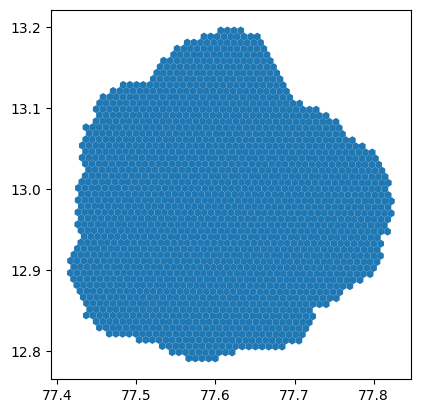

In [25]:
df1.plot()

In [26]:
s=df1.geom
df1["centroid"]=s.centroid

C:\Users\chemi\AppData\Local\Temp\ipykernel_19612\2286017200.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1["centroid"]=s.centroid
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [27]:
df1

,index,gid,hexid08,postcode,is_tc_buf,t_name_buf,is_sdc,is_dc,sd_name,d_name,s_name,is_sc,geohash,geom,centroid
8489,8489,13656,88601458b9fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fqbde237,"MULTIPOLYGON (((77.44762 12.99887, 77.44337 12...",POINT (77.44345 13.00138)
8490,8490,13657,88601458bbfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fnf6xk98,"MULTIPOLYGON (((77.43921 12.99890, 77.43496 12...",POINT (77.43504 13.00140)
8491,8491,13658,88601458bdfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr4425vbpu2,"MULTIPOLYGON (((77.45195 13.00634, 77.44770 13...",POINT (77.44778 13.00884)
8492,8492,13659,88601458c1fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fftz2u4p,"MULTIPOLYGON (((77.47670 12.97636, 77.47245 12...",POINT (77.47253 12.97887)
8493,8493,13660,88601458c3fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr1fdxxsbbb,"MULTIPOLYGON (((77.46828 12.97639, 77.46404 12...",POINT (77.46412 12.97889)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11839,11839,17022,8861892d41fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62mdv73q2,"MULTIPOLYGON (((77.71440 13.08037, 77.71014 13...",POINT (77.71022 13.08288)
11840,11840,17023,8861892d43fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62jstqy63,"MULTIPOLYGON (((77.70596 13.08040, 77.70170 13...",POINT (77.70179 13.08291)
11841,11841,17024,8861892d45fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62rn0bf0g,"MULTIPOLYGON (((77.71875 13.08784, 77.71449 13...",POINT (77.71457 13.09035)
11842,11842,17025,8861892d47fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,Karnataka,IND029,tdr62ppbuph7,"MULTIPOLYGON (((77.71031 13.08787, 77.70605 13...",POINT (77.70613 13.09038)


<AxesSubplot: >

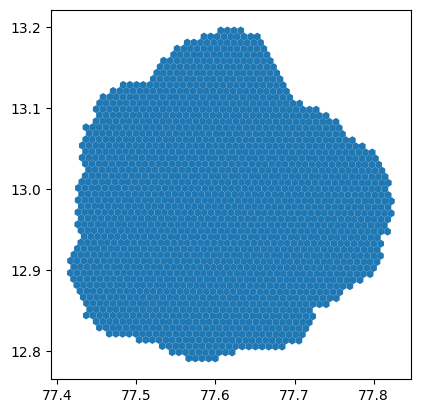

In [28]:
df1["geom"].plot()

In [29]:
df1['long'] = df1.centroid.x
df1['lat'] = df1.centroid.y

C:\Users\chemi\AppData\Local\Temp\ipykernel_19612\3185252505.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['long'] = df1.centroid.x
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\chemi\AppData\Local\Temp\ipykernel_19612\3185252505.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['lat'] = df1.centroid.y
C:\Users\chemi\Desktop\

In [30]:
import numpy as np
from shapely.geometry import Point
rnd_point_1=[]
for i in df1.geom:
    min_x,min_y,max_x,max_y=i.bounds
    x= Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
    rnd_point_1.append(x)
df1["rnd_point_1"]=rnd_point_1


C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [31]:
import numpy as np
from shapely.geometry import Point
rnd_point_2=[]
for i in df1.geom:
    min_x,min_y,max_x,max_y=i.bounds
    x= Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
    rnd_point_2.append(x)
df1["rnd_point_2"]=rnd_point_2
rnd_point_2

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


 ...]

In [32]:
# change datatype of column form object to geometry
df1= gpd.GeoDataFrame(df1, geometry='rnd_point_1')
df1= gpd.GeoDataFrame(df1, geometry='rnd_point_2')

In [33]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1906 entries, 8489 to 11843
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        1906 non-null   int64   
 1   gid          1906 non-null   int64   
 2   hexid08      1906 non-null   object  
 3   postcode     1906 non-null   object  
 4   is_tc_buf    1906 non-null   object  
 5   t_name_buf   1906 non-null   object  
 6   is_sdc       1906 non-null   object  
 7   is_dc        1906 non-null   object  
 8   sd_name      1906 non-null   object  
 9   d_name       1906 non-null   object  
 10  s_name       1906 non-null   object  
 11  is_sc        1906 non-null   object  
 12  geohash      1906 non-null   object  
 13  geom         1906 non-null   geometry
 14  centroid     1906 non-null   geometry
 15  long         1906 non-null   float64 
 16  lat          1906 non-null   float64 
 17  rnd_point_1  1906 non-null   geometry
 18  rnd_point_2  190

In [34]:
df1['long_1'] = df1.rnd_point_1.x
df1['lat_1'] = df1.rnd_point_1.y

In [35]:
df1['long_2'] = df1.rnd_point_2.x
df1['lat_2'] = df1.rnd_point_2.y

In [36]:
df1=df1.drop(columns="geom")

In [37]:
df1

,index,gid,hexid08,postcode,is_tc_buf,t_name_buf,is_sdc,is_dc,sd_name,d_name,...,geohash,centroid,long,lat,rnd_point_1,rnd_point_2,long_1,lat_1,long_2,lat_2
8489,8489,13656,88601458b9fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr1fqbde237,POINT (77.44345 13.00138),77.443455,13.001377,POINT (77.44412 12.99903),POINT (77.44544 13.00080),77.444121,12.999035,77.445439,13.000795
8490,8490,13657,88601458bbfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr1fnf6xk98,POINT (77.43504 13.00140),77.435044,13.001399,POINT (77.43597 12.99901),POINT (77.43928 13.00348),77.435968,12.999012,77.439285,13.003480
8491,8491,13658,88601458bdfffff,562130,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr4425vbpu2,POINT (77.44778 13.00884),77.447783,13.008841,POINT (77.44682 13.01009),POINT (77.44567 13.01030),77.446818,13.010094,77.445672,13.010302
8492,8492,13659,88601458c1fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr1fftz2u4p,POINT (77.47253 12.97887),77.472531,12.978867,POINT (77.47504 12.97471),POINT (77.47099 12.97791),77.475037,12.974712,77.470993,12.977915
8493,8493,13660,88601458c3fffff,560091,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr1fdxxsbbb,POINT (77.46412 12.97889),77.464118,12.978892,POINT (77.46503 12.98201),POINT (77.46807 12.97749),77.465034,12.982011,77.468072,12.977492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11839,11839,17022,8861892d41fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr62mdv73q2,POINT (77.71022 13.08288),77.710223,13.082878,POINT (77.70918 13.08356),POINT (77.71275 13.07801),77.709177,13.083558,77.712753,13.078006
11840,11840,17023,8861892d43fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr62jstqy63,POINT (77.70179 13.08291),77.701785,13.082905,POINT (77.69935 13.08091),POINT (77.69976 13.08272),77.699345,13.080913,77.699755,13.082716
11841,11841,17024,8861892d45fffff,560049,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr62rn0bf0g,POINT (77.71457 13.09035),77.714572,13.090350,POINT (77.71241 13.09491),POINT (77.71593 13.09373),77.712407,13.094911,77.715933,13.093732
11842,11842,17025,8861892d47fffff,562149,IND029572803162,Bengaluru,IND02957205542,IND029572,Bangalore North,Bangalore,...,tdr62ppbuph7,POINT (77.70613 13.09038),77.706133,13.090377,POINT (77.70502 13.08785),POINT (77.70340 13.09060),77.705018,13.087854,77.703401,13.090600


In [38]:
df1.to_csv(r"C:\Users\chemi\Desktop\save csv\hexgrid_08_bom_ii_geom.csv",index=False)